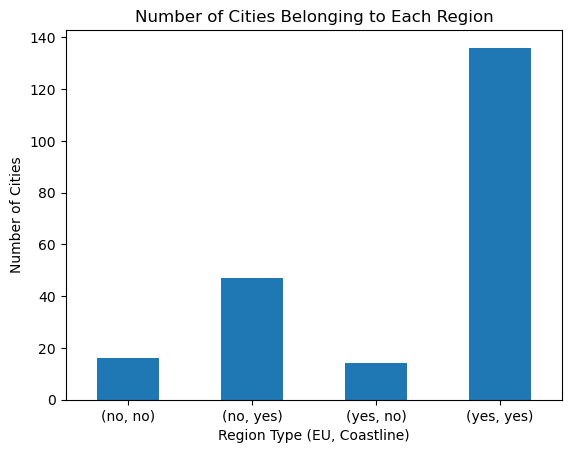

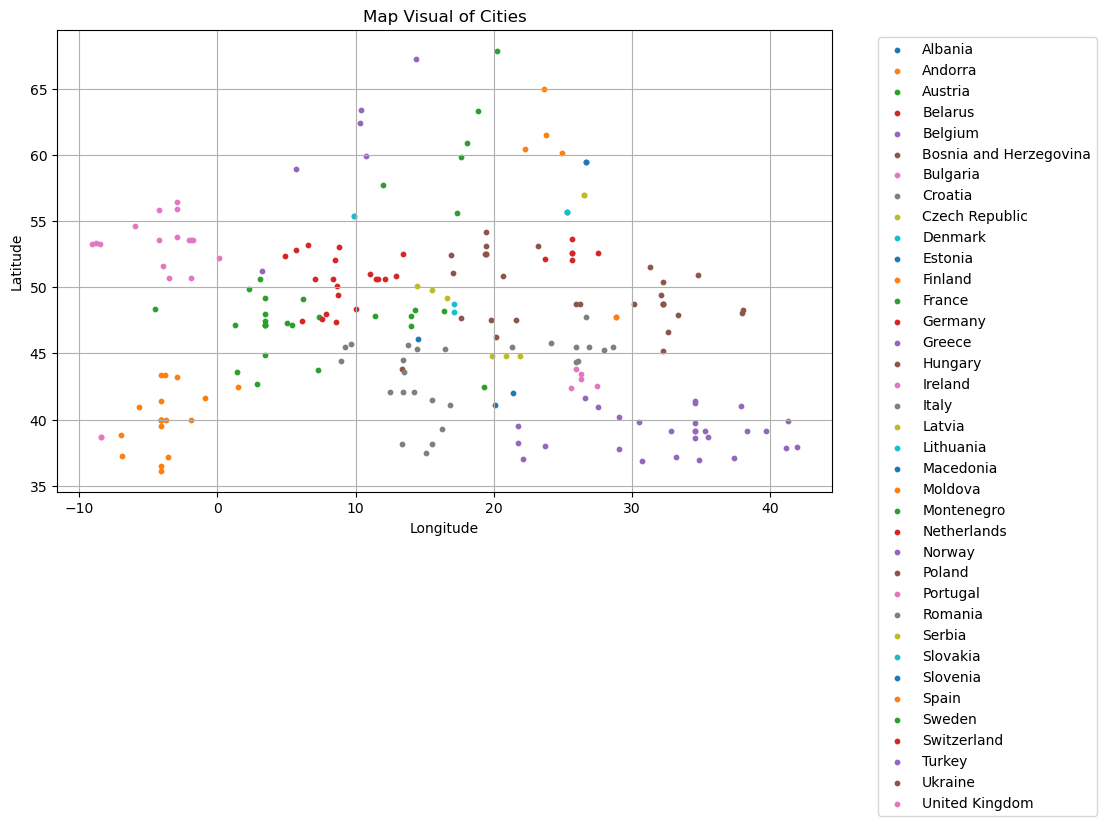

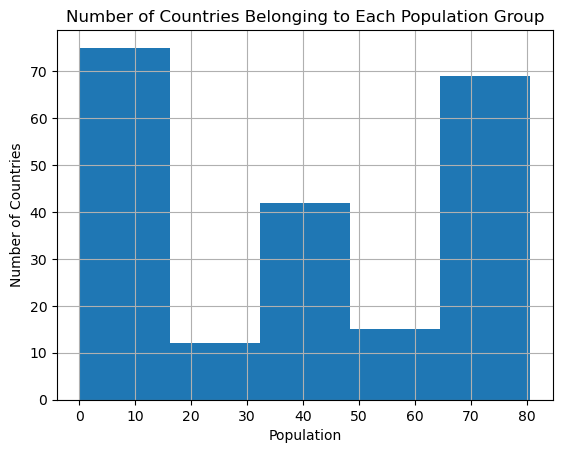

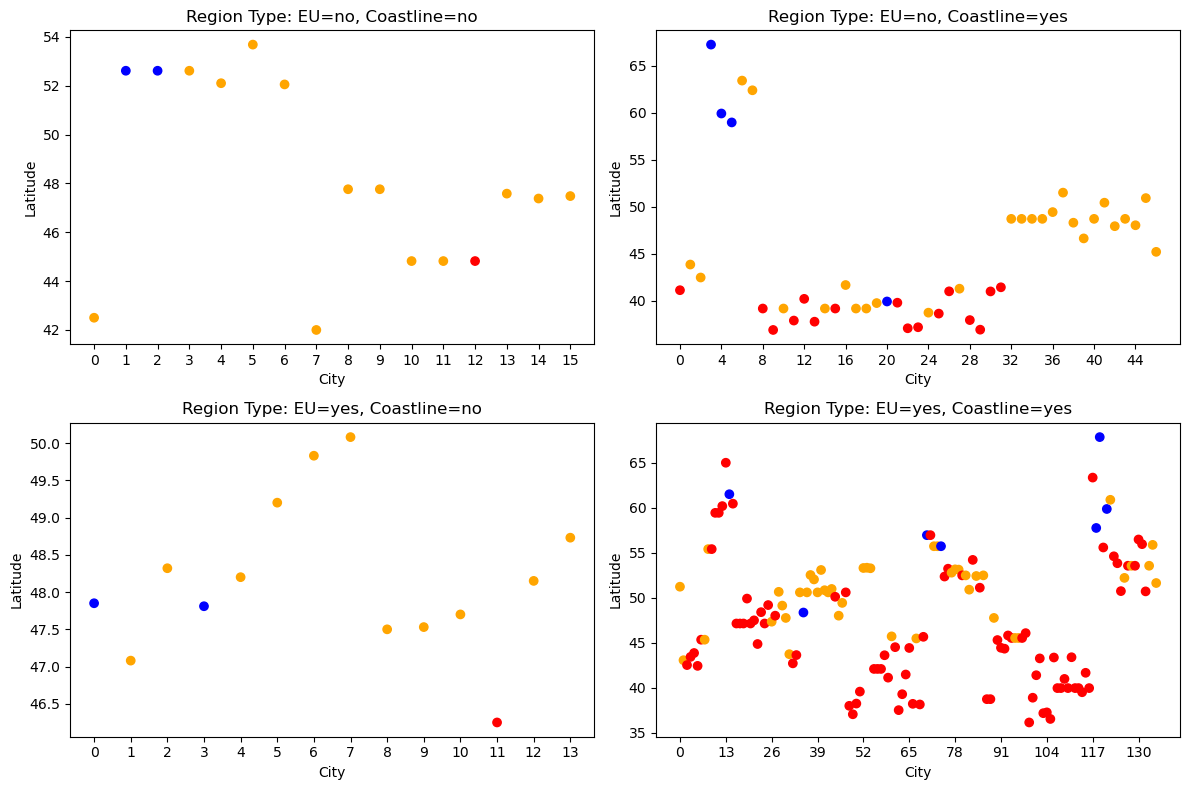

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

df = pd.read_csv('EuCitiesTemperatures.csv')

# PREPROCESSING / ANALYSIS

# 1. Fill in the missing latitude and longitude values by calculating the average for that country. 
# Round the average to 2 decimal places.
avg = df.groupby('country')[['latitude', 'longitude']].mean().round(2)

df['latitude'] = df['latitude'].fillna(df['country'].map(avg['latitude']))
df['longitude'] = df['longitude'].fillna(df['country'].map(avg['longitude']))

# 2. Find out the subset of cities that lie between latitudes 40 to 60 (both inclusive) and longitudes 15 to 30 (both inclusive). 
# Find out which countries have the maximum number of cities in this geographical band.
subset_cities = df[(df['latitude'].between(40, 60)) & (df['longitude'].between(15, 30))]

max_cities = subset_cities['country'].value_counts().idxmax()
count_cities = subset_cities['country'].value_counts().max()
max_countries = subset_cities['country'].value_counts()[subset_cities['country'].value_counts() == count_cities]

# 3. Fill in the missing temperature values by the average temperature value of the similar region type. 
# A region type would be a combinaton of whether it is in EU (yes/no) and whether it has a coastline (yes/no).
df['temperature'] = df['temperature'].fillna(df.groupby(['EU', 'coastline'])['temperature'].transform('mean'))

# VISUALIZATION

# 1. Plot a bar chart for the number of cities belonging to each of the regions described in Preprocessing/Analysis #3 above.
count_regions = df.groupby(['EU', 'coastline']).size()
count_regions.plot(kind='bar')
plt.title('Number of Cities Belonging to Each Region')
plt.xlabel('Region Type (EU, Coastline)')
plt.ylabel('Number of Cities')
plt.xticks(rotation=0)
plt.show()

# 2. Plot a scatter plot of latitude (y-axis) v/s longitude (x-axis) values to get a map-like visual of the cities under consideration. 
# All the cities in the same country should have the same color.
plt.figure(figsize=(10, 6))
for country, group in df.groupby('country'):
    plt.scatter(group['longitude'], group['latitude'], label=country, s=10)  # Reduce size of points
plt.title('Map Visual of Cities')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True)
plt.show()

# 3. The population column contains values unique to each country. So two cities of the same country will show the same population value. 
# Plot a histogram of the number of countries belonging to each population group: split the population values into 5 bins (groups).
plt.hist(df['population'], bins=5)
plt.title('Number of Countries Belonging to Each Population Group')
plt.xlabel('Population')
plt.ylabel('Number of Countries')
plt.grid(True)
plt.show()

# 4. Plot subplots (2, 2), with proper titles, one each for the region types described in Preprocessing/Analysis #3 above.
region_types = df.groupby(['EU', 'coastline'])
fig, axs = plt.subplots(2, 2, figsize=(12, 8))
for (eu, coastline), ax in zip(region_types.groups.keys(), axs.flatten()):
    region_data = region_types.get_group((eu, coastline))
    colors = ['blue' if temp < 6 else 'orange' if 6 <= temp <= 10 else 'red' for temp in region_data['temperature']]
    ax.scatter(range(len(region_data)), region_data['latitude'], c=colors)
    ax.set_title(f'Region Type: EU={eu}, Coastline={coastline}')
    ax.set_ylabel('Latitude')
    ax.set_xlabel('City')

    ticks = max(len(region_data) // 10, 1) 
    ax.set_xticks(range(0, len(region_data), ticks))
    ax.set_xticklabels(range(0, len(region_data), ticks))
    
plt.tight_layout()
plt.show()